<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Multiplicative_model_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('sales_data.csv')

In [81]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [82]:
df.dtypes

Years     object
Sales    float64
dtype: object

In [83]:
df['Years'] = pd.to_datetime(df['Years'])

In [84]:
df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [85]:
df['quarter'] = df['Years'].dt.quarter
df['month_name'] = df['Years'].dt.month_name()

In [86]:
df.head()

,Years,Sales,quarter,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,1,February
2,2001-03-01,101.6,1,March
3,2001-04-01,152.4,2,April
4,2001-05-01,215.9,2,May


In [87]:
df['time'] = np.arange(1,73,1)

In [88]:
df_train = df.head(n=48)
df_test =df.loc[48:]

In [89]:
df_train.shape, df_test.shape

((48, 5), (24, 5))

Trend model

In [90]:
X_train = df_train[['time']].values
y_train = df_train['Sales'].values
X_train.shape, y_train.shape



((48, 1), (48,))

In [91]:
X_test = df_test[['time']].values
y_test = df_test['Sales'].values
X_test.shape, y_test.shape



((24, 1), (24,))

In [92]:
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_fittedvalues= model.predict(X_train)

Step 2: Take trend prediction (T)

In [94]:
df_train['predicted_T'] = y_fittedvalues

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_train.head()

,Years,Sales,quarter,month_name,time,predicted_T
0,2001-01-01,139.7,1,January,1,138.671939
1,2001-02-01,114.3,1,February,2,143.082175
2,2001-03-01,101.6,1,March,3,147.492412
3,2001-04-01,152.4,2,April,4,151.902649
4,2001-05-01,215.9,2,May,5,156.312885


Step 3: Compute Deviation values
   SI = TSI / T

In [96]:
df_train['SI'] = df_train['Sales'] / df_train['predicted_T']
df_train.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Years,Sales,quarter,month_name,time,predicted_T,SI
0,2001-01-01,139.7,1,January,1,138.671939,1.007414
1,2001-02-01,114.3,1,February,2,143.082175,0.798842
2,2001-03-01,101.6,1,March,3,147.492412,0.688849
3,2001-04-01,152.4,2,April,4,151.902649,1.003274
4,2001-05-01,215.9,2,May,5,156.312885,1.381204
5,2001-06-01,228.6,2,June,6,160.723122,1.422322
6,2001-07-01,215.9,3,July,7,165.133359,1.307428
7,2001-08-01,190.5,3,August,8,169.543595,1.123605
8,2001-09-01,177.8,3,September,9,173.953832,1.022110
9,2001-10-01,139.7,4,October,10,178.364069,0.783229


Step 4: Take the average seasonality values

In [97]:
deviation_season = df_train[['month_name','SI']].groupby(by='month_name').mean().rename(columns={'SI':'correction_factor'})
deviation_season

,correction_factor
month_name,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


Step 5: Computing the fitted values

In [98]:
df_train1 = df_train.merge(deviation_season, on ='month_name')
df_train1.head()

,Years,Sales,quarter,month_name,time,predicted_T,SI,correction_factor
0,2001-01-01,139.7,1,January,1,138.671939,1.007414,0.841208
1,2002-01-01,165.1,1,January,13,191.594779,0.861715,0.841208
2,2003-01-01,177.8,1,January,25,244.517618,0.727146,0.841208
3,2004-01-01,228.6,1,January,37,297.440458,0.768557,0.841208
4,2001-02-01,114.3,1,February,2,143.082175,0.798842,0.840934


In [99]:
df_train1['Fitted_values'] = df_train1['predicted_T'] * df_train1['correction_factor']

In [100]:
df_train1.head()

,Years,Sales,quarter,month_name,time,predicted_T,SI,correction_factor,Fitted_values
0,2001-01-01,139.7,1,January,1,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,1,January,13,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,1,January,25,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,1,January,37,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,1,February,2,143.082175,0.798842,0.840934,120.322726


Forecasted data

In [103]:
ftrend = model.predict(X_test) 
df_test['forecasted trend'] = ftrend
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Years,Sales,quarter,month_name,time,forecasted trend
48,2005-01-01,266.7,1,January,49,350.363298
49,2005-02-01,317.5,1,February,50,354.773535
50,2005-03-01,368.3,1,March,51,359.183771
51,2005-04-01,431.8,2,April,52,363.594008
52,2005-05-01,457.2,2,May,53,368.004244


In [111]:
df_test1 = df_test.merge(deviation_season, on ='month_name')
df_test1.head()

,Years,Sales,quarter,month_name,time,forecasted trend,correction_factor
0,2005-01-01,266.7,1,January,49,350.363298,0.841208
1,2006-01-01,431.8,1,January,61,403.286138,0.841208
2,2005-02-01,317.5,1,February,50,354.773535,0.840934
3,2006-02-01,457.2,1,February,62,407.696374,0.840934
4,2005-03-01,368.3,1,March,51,359.183771,0.804644


In [113]:
df_test1['Forecasted_mul'] = df_test1['forecasted trend'] * df_test1['correction_factor']

In [114]:
df_test1.head()

,Years,Sales,quarter,month_name,time,forecasted trend,correction_factor,Forecasted_mul
0,2005-01-01,266.7,1,January,49,350.363298,0.841208,294.728346
1,2006-01-01,431.8,1,January,61,403.286138,0.841208,339.247452
2,2005-02-01,317.5,1,February,50,354.773535,0.840934,298.341276
3,2006-02-01,457.2,1,February,62,407.696374,0.840934,342.845914
4,2005-03-01,368.3,1,March,51,359.183771,0.804644,289.015154


Margin of error


In [116]:
 error = df_train1['Sales'] - df_train1['Fitted_values']

In [118]:
se = error.std()
ME = 1.96 * se
print(ME)

36.42544715050407


In [128]:
df_train1 = df_train1.sort_values(by='Years')
df_test1 = df_test1.sort_values(by='Years')

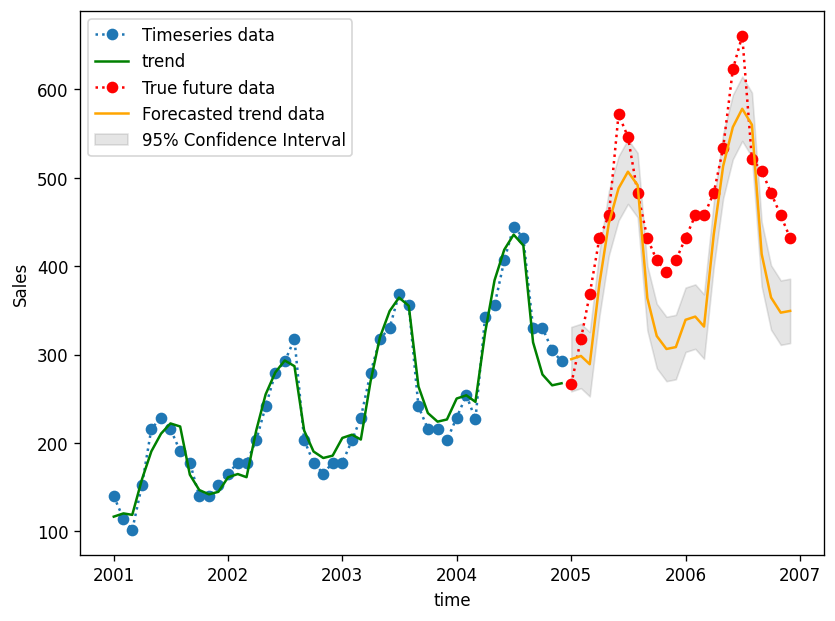

In [129]:


# Visualize the data
plt.figure(figsize =(8,6),dpi=120)
plt.plot(df_train1['Years'],df_train1['Sales'],'o:')
plt.plot(df_train1['Years'],df_train1['Fitted_values'],'g')

plt.plot(df_test1['Years'],df_test1['Sales'],'ro:')
# Forecasted data
plt.plot(df_test1['Years'],df_test1['Forecasted_mul'],'b',color='orange')
# Margin of data
ci_plus = df_test1['Forecasted_mul'] + ME
ci_minus = df_test1['Forecasted_mul'] - ME
plt.fill_between(df_test1['Years'],ci_plus,ci_minus,alpha=0.1, color='black' )
plt.legend(['Timeseries data','trend','True future data','Forecasted trend data','95% Confidence Interval'])

plt.xlabel('time')
plt.ylabel('Sales')

plt.show()

